In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# read the data if there is any error utf-8 convert the csv in utf8

df = pd.read_csv(r"C:\Users\ramvi\Downloads\Diwali Sales Data.csv")
df

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370.0
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367.0
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213.0
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206.0


In [3]:
# check the size of dataset
df.shape

(11251, 13)

In [5]:
df.info(b)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [15]:
# amount has null values
df.Amount.isna().sum()

df = df.dropna()

In [7]:
# since there is no null values in data lets check the noise

for i in df.columns:
    print(i)
    print(df[i].unique(),"\n")

User_ID
[1002903 1000732 1001990 ... 1001542 1004378 1005258] 

Cust_name
['Sanskriti' 'Kartik' 'Bindu' ... 'Chris' 'Madan Mohan' 'Nicole'] 

Product_ID
['P00125942' 'P00110942' 'P00118542' ... 'P00307142' 'P00044742'
 'P00296942'] 

Gender
['F' 'M'] 

Age Group
['26-35' '0-17' '18-25' '55+' '46-50' '51-55' '36-45'] 

Age
[28 35 16 25 61 26 34 20 46 24 48 29 54 19 30 53 83 33 40 39 32 36 55 27
 72 45 43 47 22 52 18 21 38 37 23 49 42 50 31 44 41 66 15 51 77 87 79 71
 88 58 82 62 92 12 63 17 13 67 90 56 75 81 64 73 84 14 76 86 89 68 91 85
 70 80 65 74 69 78 57 60 59] 

Marital_Status
[0 1] 

State
['Maharashtra' 'Andhra\xa0Pradesh' 'Uttar Pradesh' 'Karnataka' 'Gujarat'
 'Himachal Pradesh' 'Delhi' 'Madhya Pradesh' 'Jharkhand' 'Kerala'
 'Haryana' 'Bihar' 'Rajasthan' 'Uttarakhand' 'Telangana' 'Punjab'] 

Zone
['Western' 'Southern' 'Central' 'Northern' 'Eastern'] 

Occupation
['Healthcare' 'Govt' 'Automobile' 'Construction' 'Food Processing'
 'Lawyer' 'IT Sector' 'Media' 'Banking' 'Retail' '

In [11]:
# in state Andhra\xa0Pradesh just remove the xa0
# rest all are good to go

# lets deal here itself
df.State = df.State.replace("Andhra\xa0Pradesh","Andhra Pradesh")

# lets check 
df.State.unique()

array(['Maharashtra', 'Andhra Pradesh', 'Uttar Pradesh', 'Karnataka',
       'Gujarat', 'Himachal Pradesh', 'Delhi', 'Madhya Pradesh',
       'Jharkhand', 'Kerala', 'Haryana', 'Bihar', 'Rajasthan',
       'Uttarakhand', 'Telangana', 'Punjab'], dtype=object)

# 

In [19]:
# lets decribe to understand the numerical feature
# need to remove user_id and marital status . its not making any sense to data here

df.drop(["User_ID","Marital_Status"],axis=1).describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610858
std,12.753866,1.114967,5222.355869
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


# 

# Exploratory Data Analysis¶

# Gender

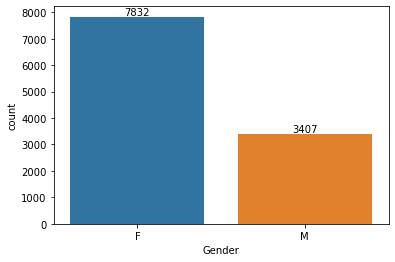

In [20]:
# plotting a bar chart for Gender and it's count so we can understand the trend
# order count

ax = sns.countplot(x = 'Gender',data = df)

for bars in ax.containers:
    ax.bar_label(bars)

<AxesSubplot:xlabel='Gender', ylabel='Amount'>

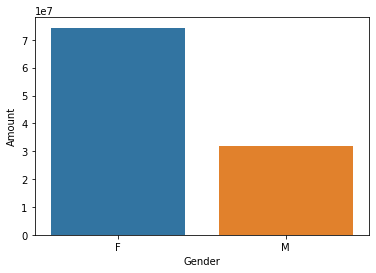

In [21]:
# plotting a bar chart for gender vs total amount
# Total amount

sales_gen = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.barplot(x = 'Gender',y= 'Amount' ,data = sales_gen)

The number of orders placed by female customers is twice as high as that of male customers. This trend is further reflected in the total amount of purchases made by each gender group.

# 

# Age

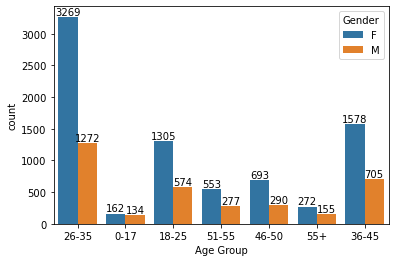

In [22]:
# plotting a bar chart for Age and it's count so we can understand the trend
# order count

ax = sns.countplot(data = df, x = 'Age Group', hue = 'Gender')

for bars in ax.containers:
    ax.bar_label(bars)

<AxesSubplot:xlabel='Age Group', ylabel='Amount'>

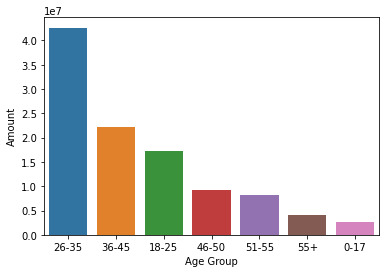

In [23]:
# plotting a bar chart for Age vs total amount
# Total Amount vs Age Group

sales_age = df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.barplot(x = 'Age Group',y= 'Amount' ,data = sales_age)

The age segment of 26-35 demonstrates the highest total expenditure, highlighting a significant purchasing power within this group.

# 

# State

<AxesSubplot:xlabel='State', ylabel='Orders'>

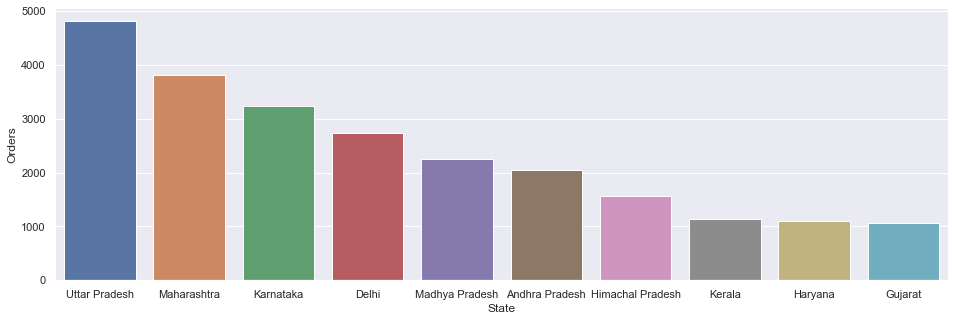

In [25]:
# total number of orders from top 10 states

sales_state = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(16,5)})
sns.barplot(data = sales_state, x = 'State',y= 'Orders')

<AxesSubplot:xlabel='State', ylabel='Amount'>

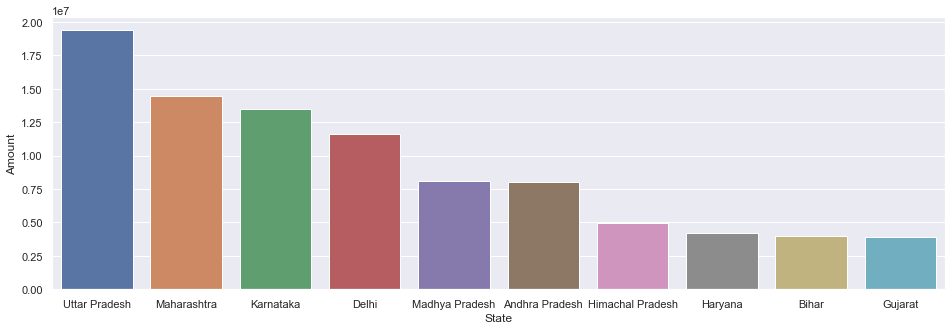

In [27]:
# total amount/sales from top 10 states

sales_state = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(16,5)})
sns.barplot(data = sales_state, x = 'State',y= 'Amount')

While Uttar Pradesh boasts the highest number of orders, it also maintains a substantial presence in terms of total sales amount, reaffirming its significant contribution to overall revenue generation.

# 

# Marital Status

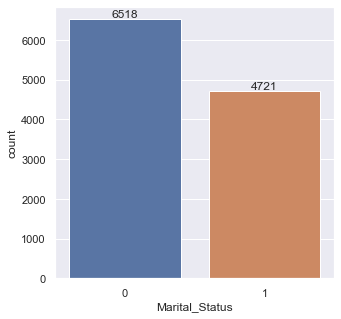

In [29]:
ax = sns.countplot(data = df, x = 'Marital_Status')

sns.set(rc={'figure.figsize':(5,3)})
for bars in ax.containers:
    ax.bar_label(bars)

<AxesSubplot:xlabel='Marital_Status', ylabel='Amount'>

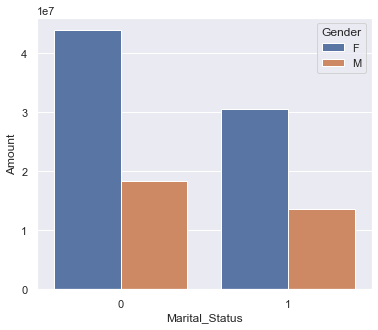

In [30]:
Marital_sales = df.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(6,5)})
sns.barplot(data = Marital_sales, x = 'Marital_Status',y= 'Amount', hue='Gender')

Unmarried women display a higher purchasing inclination compared to other demographic groups, suggesting a distinct consumer behavior pattern influenced by marital status.

# 

# Occupation

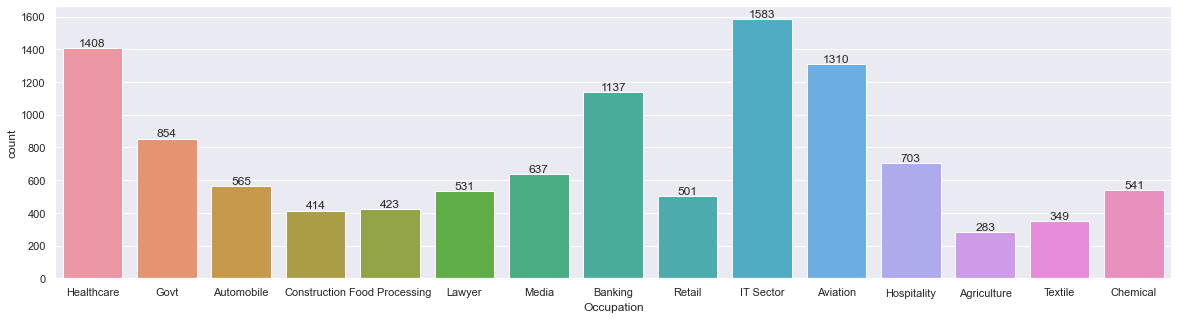

In [31]:
# ploting a bar chart to understand the trends of buying behavir by occupation 

sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = df, x = 'Occupation')

for bars in ax.containers:
    ax.bar_label(bars)

<AxesSubplot:xlabel='Occupation', ylabel='Amount'>

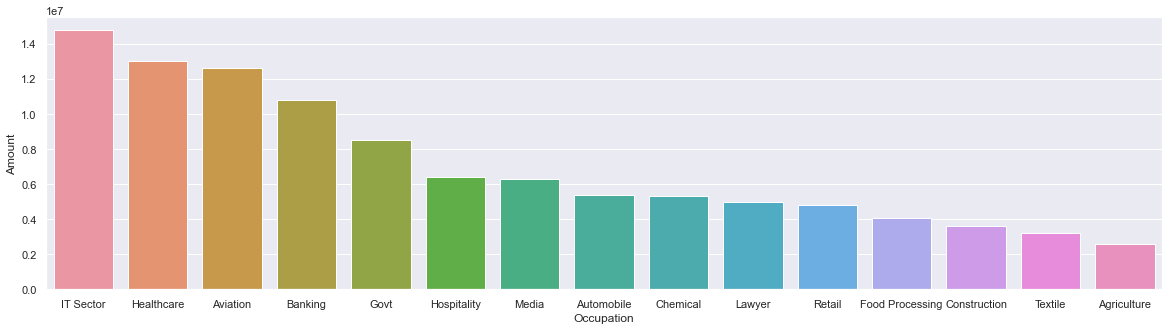

In [32]:
Sales_by_occupation = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = Sales_by_occupation, x = 'Occupation',y= 'Amount')

The graphs indicate that a significant portion of buyers are employed in the IT, healthcare, and aviation sectors, suggesting a notable consumer presence from these industries.

# 

# Category

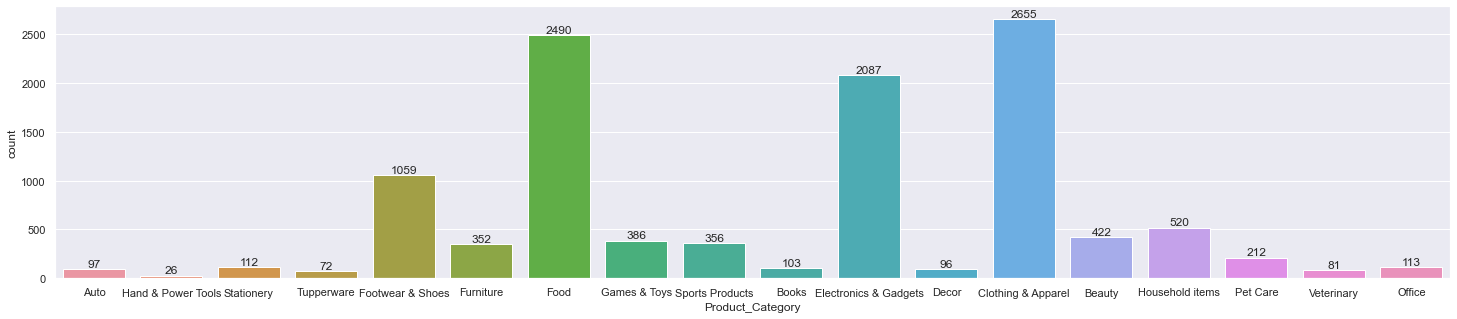

In [37]:
# ploting bar chart to find the trend in product categories

sns.set(rc={'figure.figsize':(25,5)})
ax = sns.countplot(data = df, x = 'Product_Category')

for bars in ax.containers:
    ax.bar_label(bars)

<AxesSubplot:xlabel='Product_Category', ylabel='Amount'>

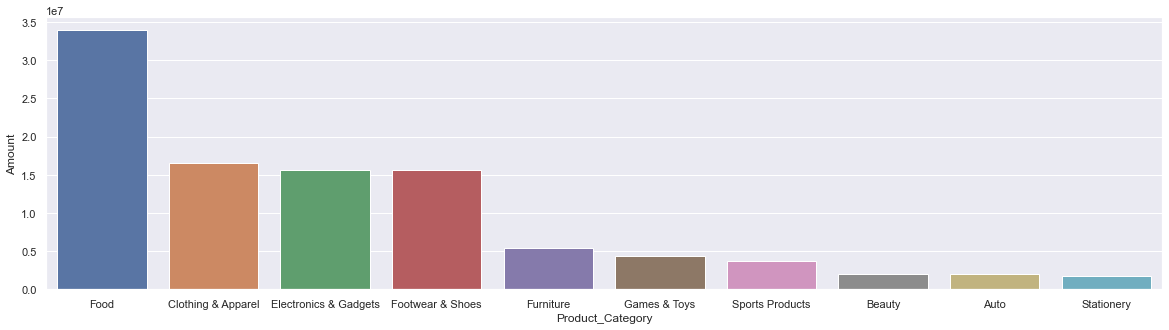

In [38]:
Sales_by_category = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = Sales_by_category, x = 'Product_Category',y= 'Amount')

In terms of the number of orders, the clothing and food categories demonstrate comparable figures, with food slightly lagging behind clothing. However, when considering the total sales amount, the food category surpasses all other categories, emerging as the top revenue generator with the highest overall sales.


# 

# Product

<AxesSubplot:xlabel='Product_ID', ylabel='Orders'>

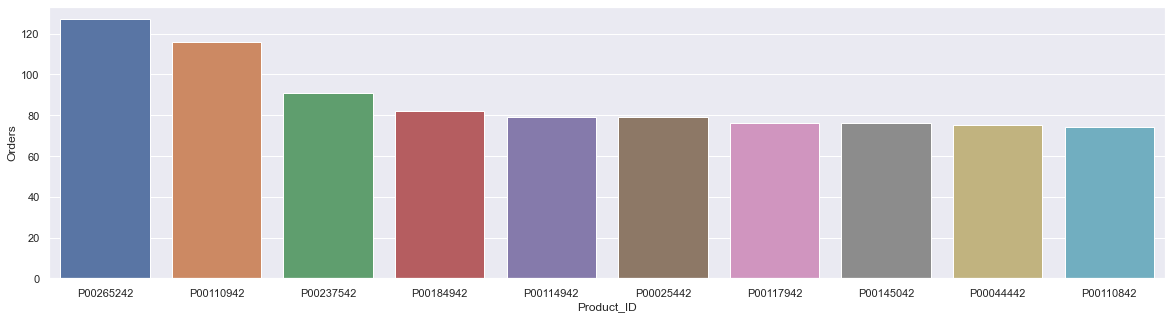

In [40]:
sales_by_product = df.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_by_product, x = 'Product_ID',y= 'Orders')

<AxesSubplot:xlabel='Product_ID'>

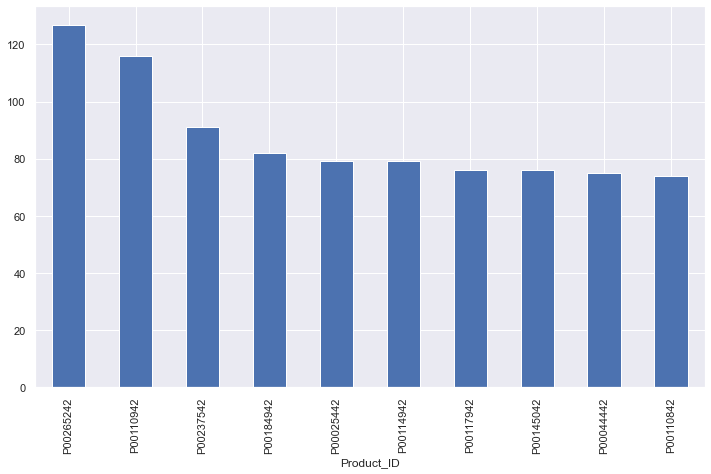

In [41]:
# top 10 most sold products (same thing as above)

fig1, ax1 = plt.subplots(figsize=(12,7))
df.groupby('Product_ID')['Orders'].sum().nlargest(10).sort_values(ascending=False).plot(kind='bar')

These products demonstrate a strong demand and significant customer preference, contributing to their prominent position in terms of order numbers.

# 

# Conclusion

Insights reveal that married women aged 26-35 years, employed in the IT, healthcare, and aviation sectors in Uttar Pradesh, Maharashtra, and Karnataka, display a higher propensity for purchasing products from the food, clothing, and electronics categories. This indicates a distinct consumer behavior pattern influenced by demographic factors and occupational preferences.